In [ ]:
!pip install scikit-learn==0.21.0

     |████████████████████████████████| 6.6MB 27kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
!pip freeze | grep scikit-learn

scikit-learn==0.21.0


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn import under_sampling, over_sampling, pipeline
from collections import Counter
from sklearn.preprocessing import Imputer
from scipy import stats
from scipy.stats import iqr
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,normalize

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier,ExtraTreesClassifier
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import log_loss,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score,f1_score
from sklearn.metrics import classification_report

#Dataset Description


The project involves the use of a dataset with 600k training data and 57 features/data. 

In the train data, 
- Features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). 
- feature names include the postfix 'bin' to indicate binary features and 'cat' to indicate categorical features. 
- Features without these designations are either continuous or ordinal. 
- Values of -1 indicate that the feature was missing from the observation. 
- The target column signifies whether a claim was filed for that policy holder.

Checking if we are connected to GPU or not

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

Mounting Google Drive to read data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
data_path='/content/drive/My Drive/Projects/Auto Insurance.csv'

In [ ]:
data=pd.read_csv(data_path)

In [ ]:
data.drop(columns=["id"],inplace=True)

In [ ]:
data.shape

(595212, 58)

In [ ]:
data.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [ ]:
data.tail()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_

#Exploratory Data Analysis

1. Write at least 3 important inferences from the data above

- Let us take the hypothesis as - Can we increase the company profit by identifying the customers who are likely to claim insurance this year

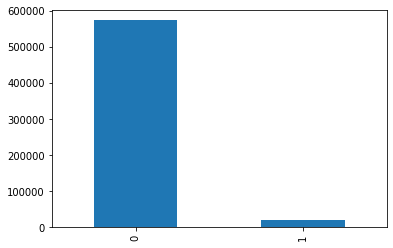

In [ ]:
data.target.value_counts().plot(kind='bar')

- Looking at the distribution, we can actually say that there are very less customers claiming insurance. 
- This means, majority of customers are not claiming the insurance. These customers are profit makers for the company
- If we can identify customers who are less likely to claim insurances and charge them less for their insurance, they would not leave the company. This also improves the market share.
- It is also important to identify the customers who are very likely to claim insurance and either deny insurance or increase their insurance. This would reduce the risk to the company.

2. Is the data balanced? Meaning are targets 0 and 1 in the right proportion?

In [ ]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
(data['target'].value_counts()/data['target'].count())*100

0    96.355248
1     3.644752
Name: target, dtype: float64

In [ ]:
data['target'].value_counts(normalize=True) * 100

0    96.355248
1     3.644752
Name: target, dtype: float64

Ans:- The dataset is highly imbalanced. Only 3.64% of data from the dataset falls in one category while other 96.36% falls in the second category

3. How many categorical features are there?

In [ ]:
cat_count=0
cat_features=[]
for col in data.columns:
  if 'cat' in col:
    cat_count=cat_count+1
    cat_features.append(col)
print(cat_features)
print('Count of categorical Features =',cat_count)

['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat']
Count of categorical Features = 14


4. How many binary features are there?

In [ ]:
bin_count=0
bin_features=[]
for col in data.columns:
  if 'bin' in col:
    bin_count=bin_count+1
    bin_features.append(col)
print(bin_features)
print('Count of Binary Features =',bin_count)

['ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin', 'ps_calc_20_bin']
Count of Binary Features = 17


5. Write inferences from data on interval variables.

In [ ]:
int_features=[]
for col in data.columns:
  if (col not in cat_features) & (col not in bin_features) & (col!='target'):
    int_features.append(col)
print(int_features)
print('Count of Inverval Features =',len(int_features))

['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14']
Count of Inverval Features = 26


In [ ]:
data[int_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_ind_01,595212.0,1.900378,1.983789,0.000000,0.000000,1.000000,3.000000,7.000000
ps_ind_03,595212.0,4.423318,2.699902,0.000000,2.000000,4.000000,6.000000,11.000000
ps_ind_14,595212.0,0.012451,0.127545,0.000000,0.000000,0.000000,0.000000,4.000000
ps_ind_15,595212.0,7.299922,3.546042,0.000000,5.000000,7.000000,10.000000,13.000000
ps_reg_01,595212.0,0.610991,0.287643,0.000000,0.400000,0.700000,0.900000,0.900000
ps_reg_02,595212.0,0.439184,0.404264,0.000000,0.200000,0.300000,0.600000,1.800000
ps_reg_03,595212.0,0.551102,0.793506,-1.000000,0.525000,0.720677,1.000000,4.037945
ps_car_11,595212.0,2.346072,0.832548,-1.000000,2.000000,3.000000,3.000000,3.000000
ps_car_12,595212.0,0.379945,0.058327,-1.000000,0.316228,0.374166,0.400000,1.264911
ps_car_13,595212.0,0.813265,0.224588,0.250619,0.670867,0.765811,0.906190,3.720626


6. Write inferences from data on ordinal variables.


<Figure size 432x288 with 0 Axes>

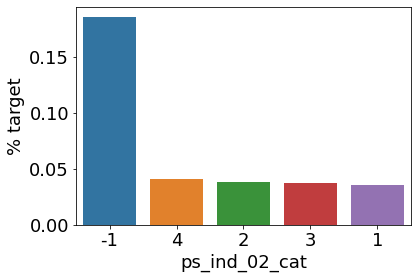

<Figure size 432x288 with 0 Axes>

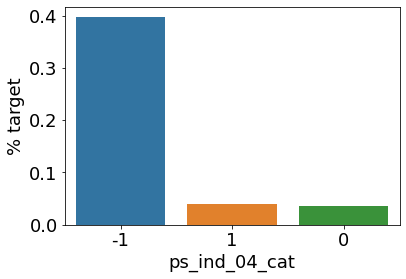

<Figure size 432x288 with 0 Axes>

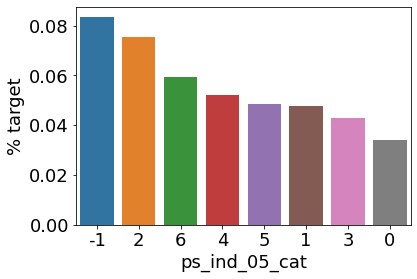

<Figure size 432x288 with 0 Axes>

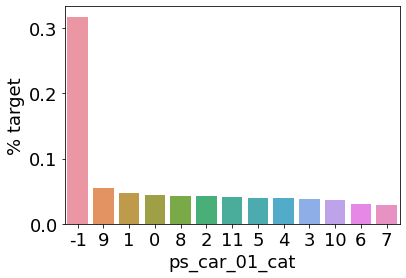

<Figure size 432x288 with 0 Axes>

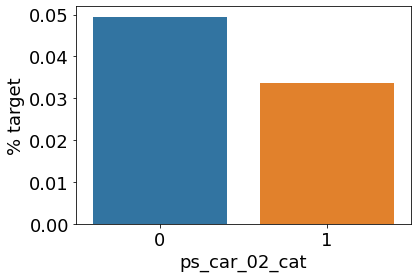

<Figure size 432x288 with 0 Axes>

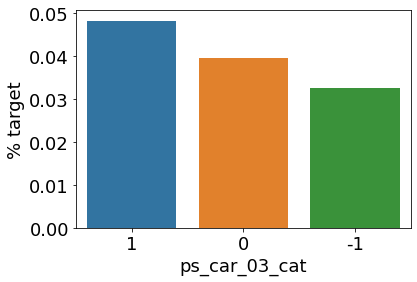

<Figure size 432x288 with 0 Axes>

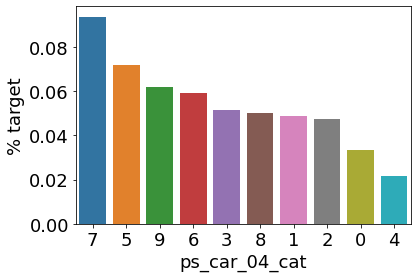

<Figure size 432x288 with 0 Axes>

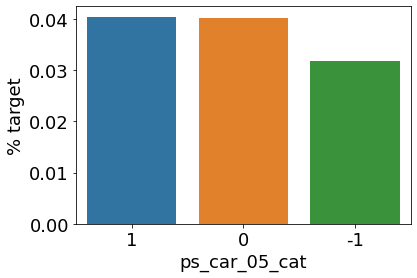

<Figure size 432x288 with 0 Axes>

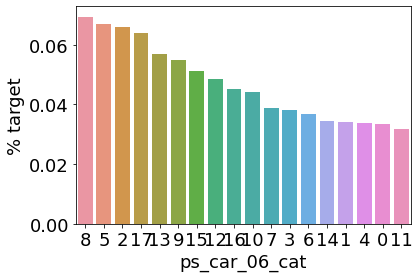

<Figure size 432x288 with 0 Axes>

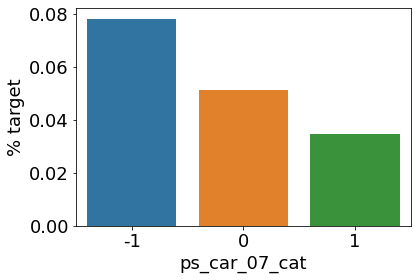

<Figure size 432x288 with 0 Axes>

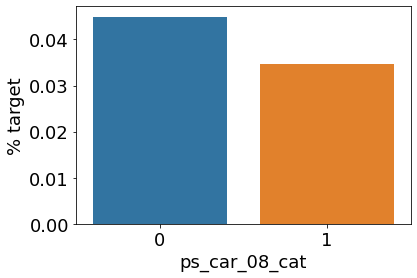

<Figure size 432x288 with 0 Axes>

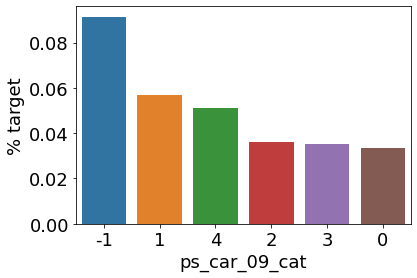

<Figure size 432x288 with 0 Axes>

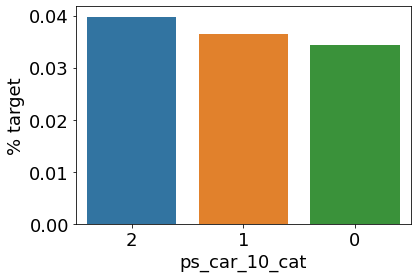

<Figure size 432x288 with 0 Axes>

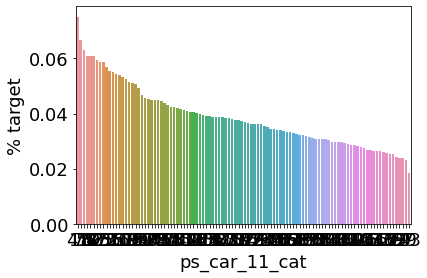

In [ ]:
for f in cat_features:
    plt.figure()
    fig, ax = plt.subplots(figsize=(6,4))
    # Calculate the percentage of target=1 per category value
    cat_perc = data[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)
    # Bar plot
    # Order the bars descending on target mean
    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.show();

- Univariate Analysis for categorical variables




<Figure size 432x288 with 0 Axes>

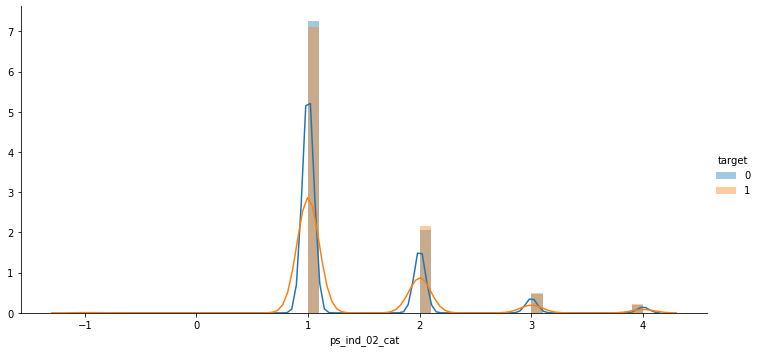

<Figure size 432x288 with 0 Axes>

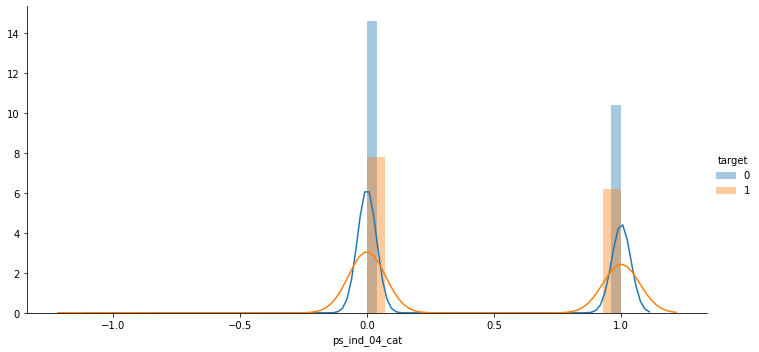

<Figure size 432x288 with 0 Axes>

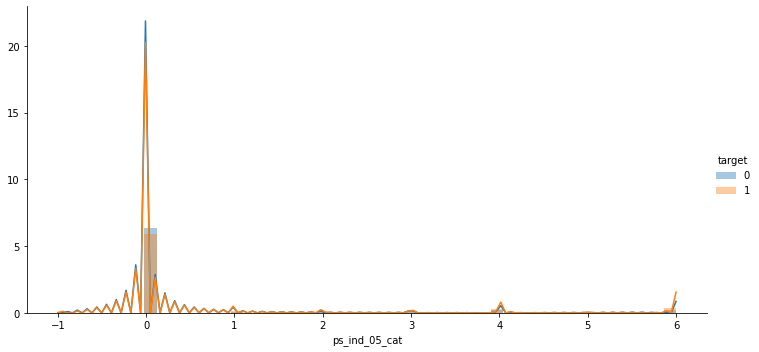

<Figure size 432x288 with 0 Axes>

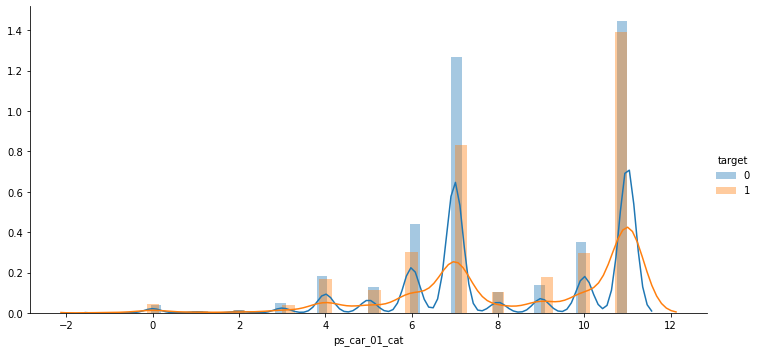

<Figure size 432x288 with 0 Axes>

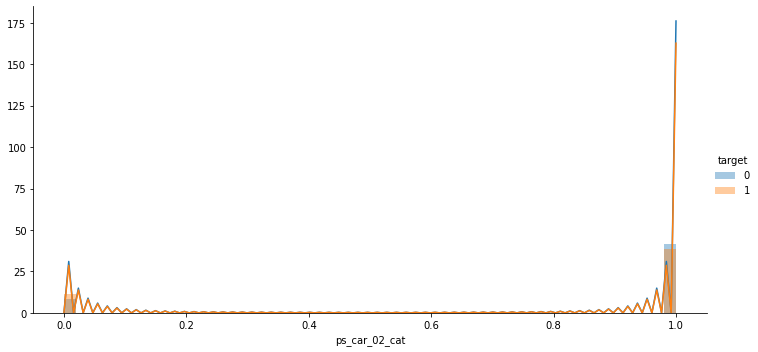

<Figure size 432x288 with 0 Axes>

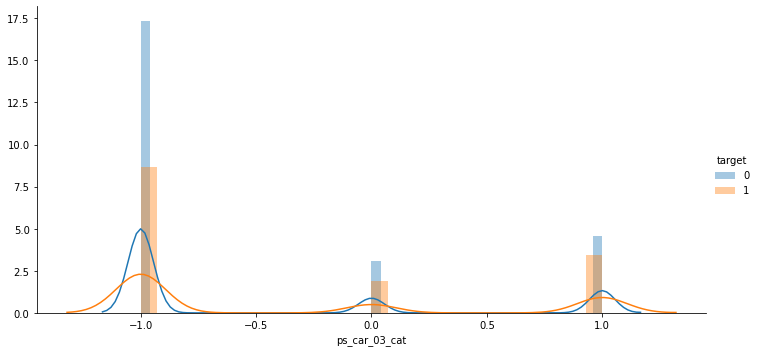

<Figure size 432x288 with 0 Axes>

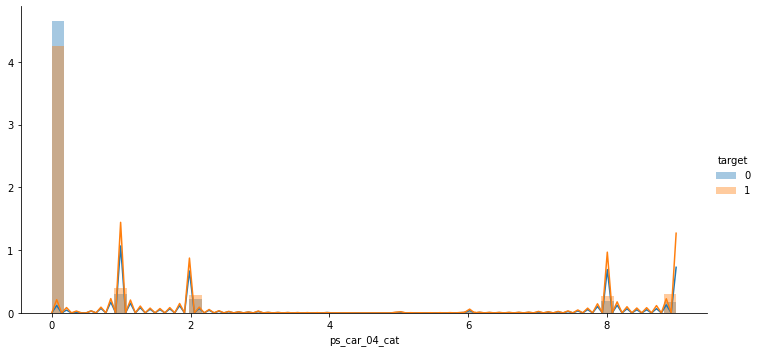

<Figure size 432x288 with 0 Axes>

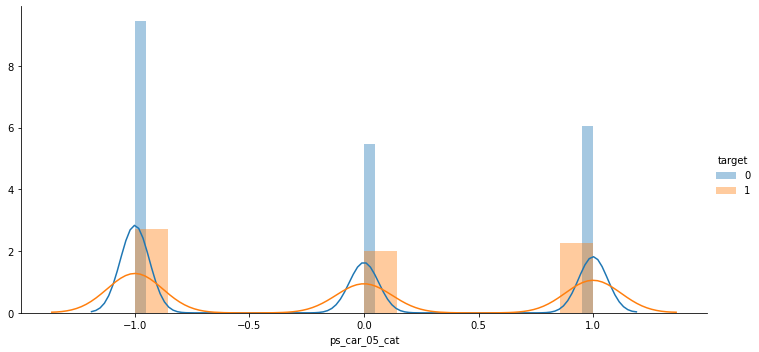

<Figure size 432x288 with 0 Axes>

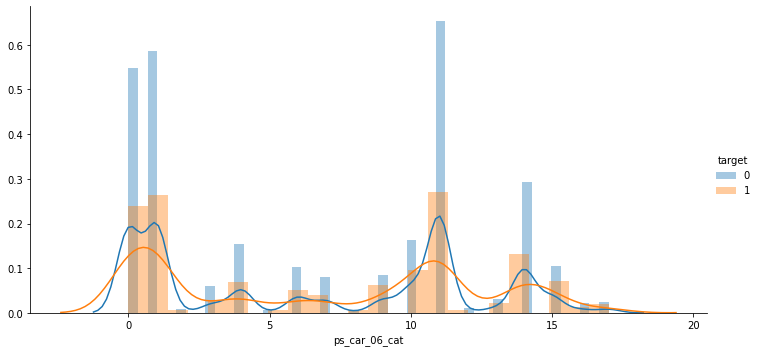

<Figure size 432x288 with 0 Axes>

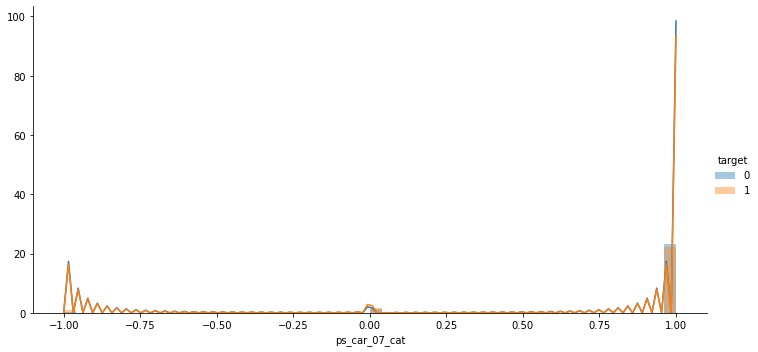

<Figure size 432x288 with 0 Axes>

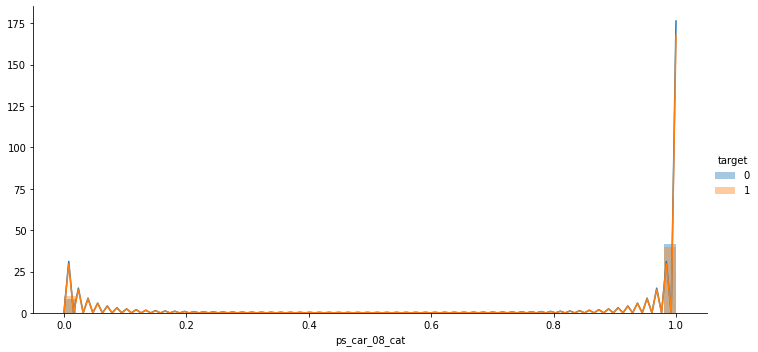

<Figure size 432x288 with 0 Axes>

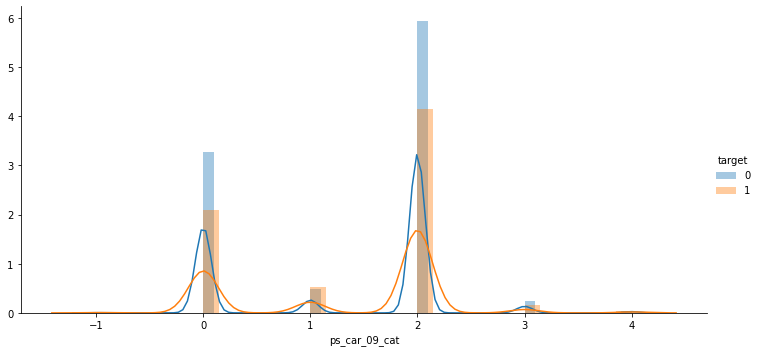

<Figure size 432x288 with 0 Axes>

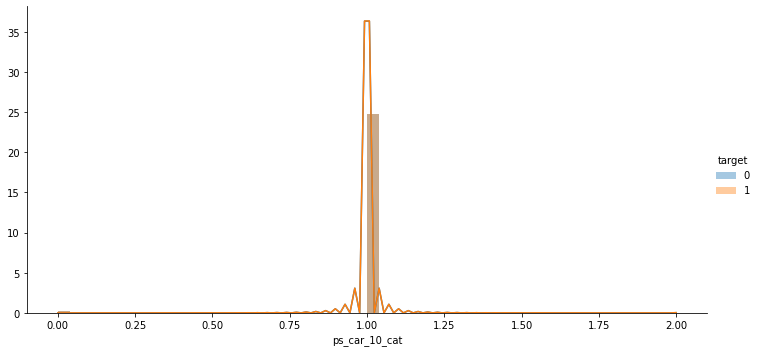

<Figure size 432x288 with 0 Axes>

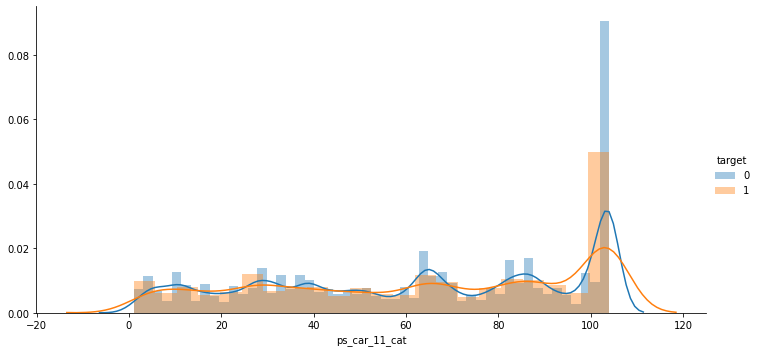

In [ ]:
for f in cat_features:
    plt.figure()
    sns.FacetGrid(data,hue='target',height=5,aspect=2).map(sns.distplot,f).add_legend()
    plt.show();

  - Important observations here are - 
    - ps_car_01_cat feature with value-7 is profitable and value-9,8 are risky
    - ps_car_03_cat feature with value-1 is much profitable
    - ps_car_04_cat feature with value-1,2,8 are risky
    - ps_car_06_cat feature with value-0,1,11 are much profitable
    - ps_car_09-cat feature with value-0,2 are profitable and value-1 is risky
    - ps_car_11_cat feature with value-103,104 are profitable and value-101,102 are risky

7. Write inferences from data on binary variables.

In [ ]:
data[bin_features].describe().T

,count,mean,std,min,25%,50%,75%,max
ps_ind_06_bin,595212.0,0.393742,0.488579,0.0,0.0,0.0,1.0,1.0
ps_ind_07_bin,595212.0,0.257033,0.436998,0.0,0.0,0.0,1.0,1.0
ps_ind_08_bin,595212.0,0.163921,0.370205,0.0,0.0,0.0,0.0,1.0
ps_ind_09_bin,595212.0,0.185304,0.388544,0.0,0.0,0.0,0.0,1.0
ps_ind_10_bin,595212.0,0.000373,0.019309,0.0,0.0,0.0,0.0,1.0
ps_ind_11_bin,595212.0,0.001692,0.041097,0.0,0.0,0.0,0.0,1.0
ps_ind_12_bin,595212.0,0.009439,0.096693,0.0,0.0,0.0,0.0,1.0
ps_ind_13_bin,595212.0,0.000948,0.030768,0.0,0.0,0.0,0.0,1.0
ps_ind_16_bin,595212.0,0.660823,0.473430,0.0,0.0,1.0,1.0,1.0
ps_ind_17_bin,595212.0,0.121081,0.326222,0.0,0.0,0.0,0.0,1.0


8. Check if the target data is proportionate or not. Hint: Below than 30% for binary data is sign of imbalance

In [ ]:
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [ ]:
(data['target'].value_counts()/data['target'].count())*100

0    96.355248
1     3.644752
Name: target, dtype: float64

Target Data is not proportionate. Dataset is highly Imbalanced. Only 3.64% of the dataset falls under one category and other category is of 96.36%.

Not to make a mess later, We will look at missing values first

12. In total, how many features have missing values?

In [ ]:
missing_val_counts={}
missing_val_percent={}
for col in data.columns:
  missing=data[data[col]==-1][col].count()
  if missing>0:
    missing_val_counts[col]=missing
    missing_percent = (missing/data.shape[0])
    missing_val_percent[col]=missing_percent
    print("{} column has {} missing values with a percentage of {:.2%} missing values".format(col,missing,missing_percent))

ps_ind_02_cat column has 216 missing values with a percentage of 0.04% missing values
ps_ind_04_cat column has 83 missing values with a percentage of 0.01% missing values
ps_ind_05_cat column has 5809 missing values with a percentage of 0.98% missing values
ps_reg_03 column has 107772 missing values with a percentage of 18.11% missing values
ps_car_01_cat column has 107 missing values with a percentage of 0.02% missing values
ps_car_03_cat column has 411231 missing values with a percentage of 69.09% missing values
ps_car_05_cat column has 266551 missing values with a percentage of 44.78% missing values
ps_car_07_cat column has 11489 missing values with a percentage of 1.93% missing values
ps_car_09_cat column has 569 missing values with a percentage of 0.10% missing values
ps_car_11 column has 5 missing values with a percentage of 0.00% missing values
ps_car_12 column has 1 missing values with a percentage of 0.00% missing values
ps_car_14 column has 42620 missing values with a percent

11. Which are the top two features in terms of missing values?

In [ ]:
key_list = list(missing_val_counts.keys()) 
val_list = list(missing_val_counts.values()) 
val_list.sort(reverse=True)
for i in range(0,2):
  for key,val in missing_val_counts.items():
    if val==val_list[i]:
      print(key,'column has',val,'missing values with missing value percent of',(val_list[i]/data.shape[0])*100)

ps_car_03_cat column has 411231 missing values with missing value percent of 69.08983689844963
ps_car_05_cat column has 266551 missing values with missing value percent of 44.78253126617071


13. What steps should be taken to handle the missing data?

- drop ps_car_03_cat & ps_car_05_cat columns as they have many missing values

In [ ]:
data.drop(columns=['ps_car_03_cat','ps_car_05_cat'],inplace=True)

In [ ]:
data.shape

(595212, 56)

- Imputing with the Most Frequest value for Categorical columns

In [ ]:
mode_imp = Imputer(missing_values=-1, strategy='most_frequent', axis=0)

data['ps_ind_02_cat'] = mode_imp.fit_transform(data[['ps_ind_02_cat']]).ravel()
data['ps_ind_04_cat'] = mode_imp.fit_transform(data[['ps_ind_04_cat']]).ravel()
data['ps_car_01_cat'] = mode_imp.fit_transform(data[['ps_car_01_cat']]).ravel()
data['ps_ind_05_cat'] = mode_imp.fit_transform(data[['ps_ind_05_cat']]).ravel()
data['ps_car_07_cat'] = mode_imp.fit_transform(data[['ps_car_07_cat']]).ravel()
data['ps_car_09_cat'] = mode_imp.fit_transform(data[['ps_car_09_cat']]).ravel()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


- Imputing with the mean for continuous variables

In [ ]:
mean_imp = Imputer(missing_values=-1, strategy='mean', axis=0)

data['ps_reg_03'] = mean_imp.fit_transform(data[['ps_reg_03']]).ravel()
data['ps_car_12'] = mean_imp.fit_transform(data[['ps_car_12']]).ravel()
data['ps_car_14'] = mean_imp.fit_transform(data[['ps_car_14']]).ravel()
data['ps_car_11'] = mean_imp.fit_transform(data[['ps_car_11']]).ravel()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Checking for Outliers

In [ ]:
for col in int_features:
    InterQuartileRange=iqr(data[col])
    InterQuartileRangeHigher=np.quantile(data[col], .75)
    InterQuartileRangeLower=np.quantile(data[col], .25)
    InRange=0
    OutRange=0
    for i in data[col]:
        if((InterQuartileRangeLower-(1.5*InterQuartileRange))<=i<=(InterQuartileRangeHigher+(1.5*InterQuartileRange))):
            InRange=InRange+1
        else:
            OutRange=OutRange+1
    if OutRange>0:
      print('****',col,'****')
      print('InterQuartileRange =',InterQuartileRange,'||',
            'InterQuartileRangeLower =',InterQuartileRangeLower,'||',
            'InterQuartileRangeHigher =',InterQuartileRangeHigher)
      print('Max =',data[col].max(),'||','Min =',data[col].min())
      print('Lower Limit =',InterQuartileRangeLower-(1.5*InterQuartileRange),'||',
            'Upper Limit =',InterQuartileRangeHigher+(1.5*InterQuartileRange))    
      print('Outliers =',OutRange,'||','Inliers =',InRange)



**** ps_ind_14 ****
InterQuartileRange = 0.0 || InterQuartileRangeLower = 0.0 || InterQuartileRangeHigher = 0.0
Max = 4 || Min = 0
Lower Limit = 0.0 || Upper Limit = 0.0
Outliers = 6380 || Inliers = 588832
**** ps_reg_02 ****
InterQuartileRange = 0.39999999999999997 || InterQuartileRangeLower = 0.2 || InterQuartileRangeHigher = 0.6
Max = 1.8 || Min = 0.0
Lower Limit = -0.39999999999999997 || Upper Limit = 1.2
Outliers = 36793 || Inliers = 558419
**** ps_reg_03 ****
InterQuartileRange = 0.33338541899999996 || InterQuartileRangeLower = 0.666614581 || InterQuartileRangeHigher = 1.0
Max = 4.037945022 || Min = 0.061237244
Lower Limit = 0.16653645250000004 || Upper Limit = 1.5000781285
Outliers = 35514 || Inliers = 559698
**** ps_car_11 ****
InterQuartileRange = 1.0 || InterQuartileRangeLower = 2.0 || InterQuartileRangeHigher = 3.0
Max = 3.0 || Min = 0.0
Lower Limit = 0.5 || Upper Limit = 4.5
Outliers = 25983 || Inliers = 569229
**** ps_car_12 ****
InterQuartileRange = 0.083772234 || InterQu

In [ ]:
# Removing to see if it has any impact
"""data = data.loc[
                (data['ps_reg_02']>-0.39999999999999997) & (data['ps_reg_02']<1.2) &
                (data['ps_reg_03']>0.16653645250000004) & (data['ps_reg_03']<1.5000781285) &
                (data['ps_car_12']>0.19056941500000002) & (data['ps_car_12']<0.525658351) &
                (data['ps_car_13']>0.3178808752499999) & (data['ps_car_13']<1.2591761172500002) &
                (data['ps_car_14']>0.2891566494999999) & (data['ps_car_14']<0.4608812935000001) &
                (data['ps_car_15']>1.6627408984999998) & (data['ps_car_15']<4.771237502500001) &
                (data['ps_calc_06']>4.0) & (data['ps_calc_06']<12.0) &
                (data['ps_calc_07']>-1.0) & (data['ps_calc_07']<7.0) &
                (data['ps_calc_08']>5.0) & (data['ps_calc_08']<113.0) &
                (data['ps_calc_09']>-2.0) & (data['ps_calc_09']<6.0) &
                (data['ps_calc_10']>0.0) & (data['ps_calc_10']<16.0) &
                (data['ps_calc_11']>-0.5) & (data['ps_calc_11']<12.0) &
                (data['ps_calc_12']>-0.5) & (data['ps_calc_12']<5.0) &
                (data['ps_calc_13']>-1.0) & (data['ps_calc_13']<7.0) &
                (data['ps_calc_14']>1) & (data['ps_calc_14']<14)
]"""

"data = data.loc[\n                (data['ps_reg_02']>-0.39999999999999997) & (data['ps_reg_02']<1.2) &\n                (data['ps_reg_03']>0.16653645250000004) & (data['ps_reg_03']<1.5000781285) &\n                (data['ps_car_12']>0.19056941500000002) & (data['ps_car_12']<0.525658351) &\n                (data['ps_car_13']>0.3178808752499999) & (data['ps_car_13']<1.2591761172500002) &\n                (data['ps_car_14']>0.2891566494999999) & (data['ps_car_14']<0.4608812935000001) &\n                (data['ps_car_15']>1.6627408984999998) & (data['ps_car_15']<4.771237502500001) &\n                (data['ps_calc_06']>4.0) & (data['ps_calc_06']<12.0) &\n                (data['ps_calc_07']>-1.0) & (data['ps_calc_07']<7.0) &\n                (data['ps_calc_08']>5.0) & (data['ps_calc_08']<113.0) &\n                (data['ps_calc_09']>-2.0) & (data['ps_calc_09']<6.0) &\n                (data['ps_calc_10']>0.0) & (data['ps_calc_10']<16.0) &\n                (data['ps_calc_11']>-0.5) & (data['

14. Which interval variables have strong correlation?

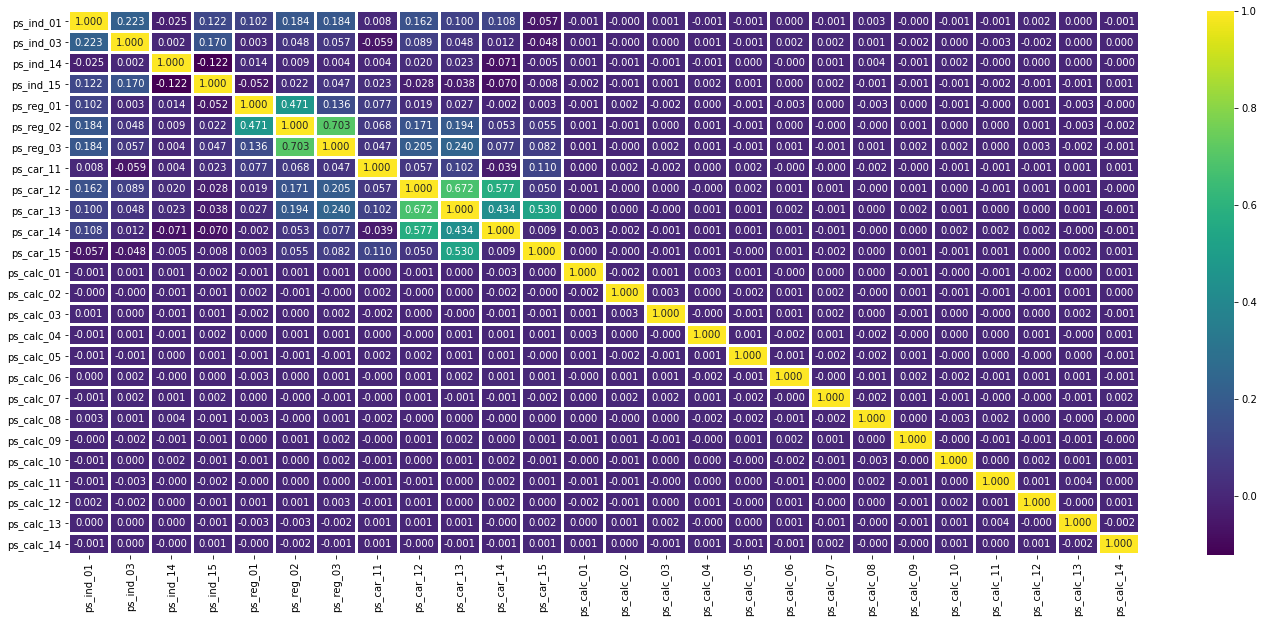

In [ ]:
plt.figure(figsize=(24,10))
sns.heatmap(data[int_features].corr(),annot=True,cmap='viridis',fmt='.3f',linewidths=2)
plt.show()

- We will consider correlations which are more than 0.5
  - ps_reg_02 & ps_reg_03 are having correlation of 0.703
  - ps_car_12 & ps_car13 are having correlation of 0.672
  - ps_car_12 and ps_car14 are having correlation of 0.577
  - ps_car_13 and ps_car15 are having correaltion of 0.530

- Let us take a sample and visualize the correlation with target

In [ ]:
smpl = data.sample(frac=0.1)

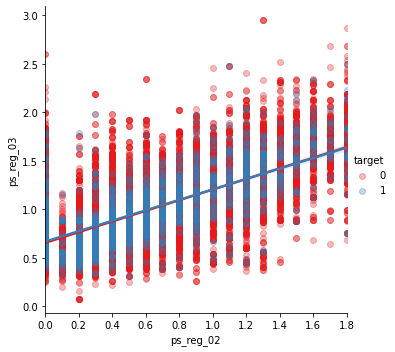

In [ ]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=smpl, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

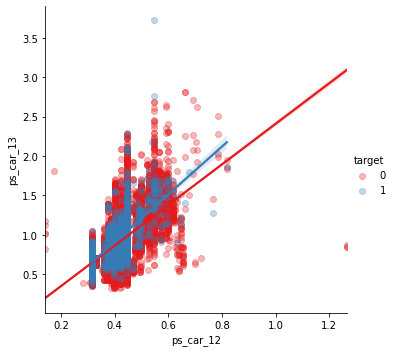

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=smpl, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

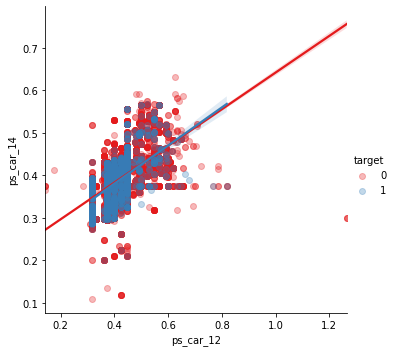

In [ ]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=smpl, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

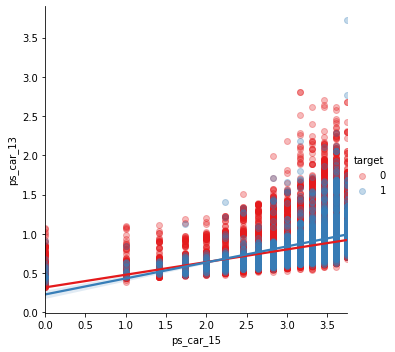

In [ ]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=smpl, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

15. What's the level of correlation among ordinal features?

In [ ]:
cat_features.remove('ps_car_03_cat')
cat_features.remove('ps_car_05_cat')

In [ ]:
corr_cat_features=cat_features.copy()
corr_cat_features.append('target')

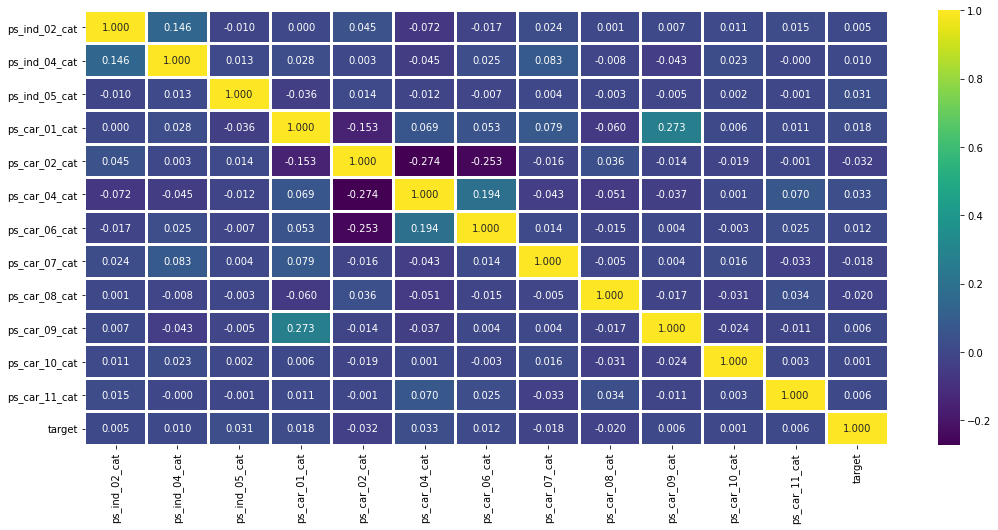

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(data[corr_cat_features].corr(),annot=True,cmap='viridis',fmt='.3f',linewidths=2)
plt.show()

  - We will consider correlations which are more than 0.2
      - ps_car_02_cat & ps_car_04_cat are having correlation of 0.274
      - ps_car_02_cat & ps_car_06_cat are having correlation of 0.253
      - ps_car_09_cat & ps_car_01_cat are having correlation of 0.273
        



- We can also use cramers_v
  - Cramer's V is a measure of association between two nominal variables, giving a value between 0 and +1 (inclusive). It is based on Pearson's chi-squared statistic and was published by Harald Cramér in 1946. 
  - Simply speaking, Cramer's V statistic allows to understand correlation between two categorical features

In [ ]:
def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = stats.chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [ ]:
rows= []

for var1 in data[cat_features]:
  col = []
  for var2 in data[cat_features]:
    cramers =cramers_V(data[cat_features][var1], data[cat_features][var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data[cat_features].columns, index =data[cat_features].columns)


In [ ]:
df

,ps_ind_02_cat,ps_ind_04_cat,ps_ind_05_cat,ps_car_01_cat,ps_car_02_cat,ps_car_04_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat
ps_ind_02_cat,1.00,0.02,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02
ps_ind_04_cat,0.02,1.00,0.0,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.00,0.05
ps_ind_05_cat,0.00,0.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ps_car_01_cat,0.00,0.01,0.0,1.00,0.03,0.00,0.00,0.09,0.01,0.14,0.00,0.01
ps_car_02_cat,0.00,0.00,0.0,0.03,1.00,0.14,0.29,0.00,0.00,0.01,0.00,0.38
ps_car_04_cat,0.00,0.01,0.0,0.00,0.14,1.00,0.11,0.05,0.01,0.01,0.00,0.28
ps_car_06_cat,0.00,0.01,0.0,0.00,0.29,0.11,1.00,0.00,0.02,0.00,0.00,0.52
ps_car_07_cat,0.00,0.01,0.0,0.09,0.00,0.05,0.00,1.00,0.00,0.00,0.00,0.03
ps_car_08_cat,0.00,0.00,0.0,0.01,0.00,0.01,0.02,0.00,1.00,0.01,0.00,0.23
ps_car_09_cat,0.00,0.00,0.0,0.14,0.01,0.01,0.00,0.00,0.01,1.00,0.00,0.02


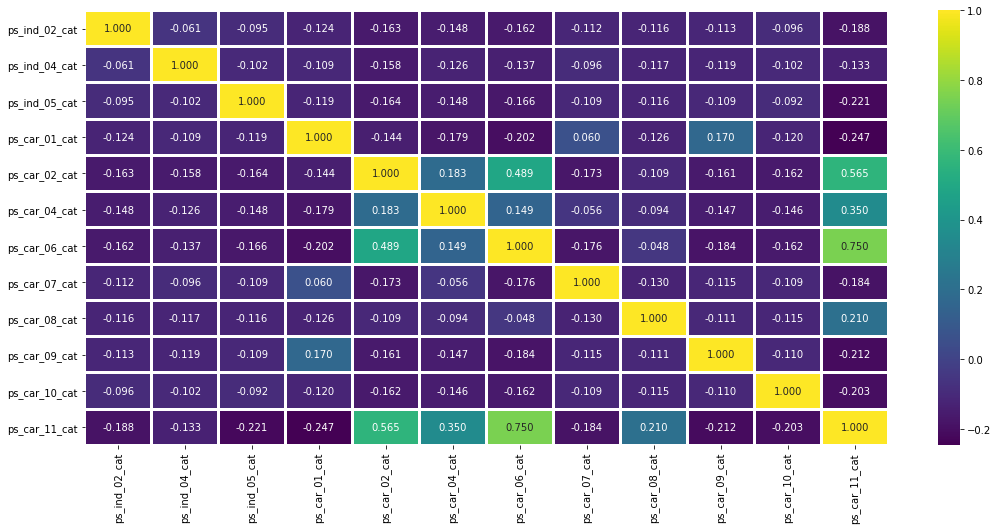

In [ ]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis',fmt='.3f',linewidths=2)
plt.show()

  - Using Cramers_v, we got
      - ps_car_06_cat & ps_car_11_cat are having correlation of 0.750
      - ps_car_02_cat & ps_car_11_cat are having correlation of 0.565
      - ps_car_02_cat & ps_car_06_cat are having correlation of 0.489
      - ps_car_04_cat & ps_car_11_cat are having correlation of 0.350
      
        



16. Implement Hot Encoding for categorical features

In [ ]:
for f in cat_features:
    dist_values = data[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 4 distinct values
Variable ps_ind_04_cat has 2 distinct values
Variable ps_ind_05_cat has 7 distinct values
Variable ps_car_01_cat has 12 distinct values
Variable ps_car_02_cat has 2 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 2 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 5 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


In [ ]:
print('Before One-Hot Encoding we have',data.shape[1],'variables')
data = pd.get_dummies(data, columns=cat_features, drop_first=True)
print('After One-Hot Encoding we have',data.shape[1],'variables')

Before One-Hot Encoding we have 56 variables
After One-Hot Encoding we have 203 variables


In [ ]:
cat_features_dummified = []
for col in data.columns:
  if 'cat' in col:
    cat_features_dummified.append(col)

In [ ]:

len(cat_features_dummified)

159

In [ ]:
len(bin_features)

17

In [ ]:
len(int_features)

26

- Let us check correlation between variables and target

In [ ]:
#Correlation with output variable
cor_target = abs(data.corr()["target"])

In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02]
relevant_features

target                1.000000
ps_ind_06_bin         0.034017
ps_ind_07_bin         0.034218
ps_ind_15             0.021506
ps_ind_16_bin         0.027778
ps_ind_17_bin         0.037053
ps_reg_01             0.022888
ps_reg_02             0.034800
ps_reg_03             0.031258
ps_car_12             0.038800
ps_car_13             0.053899
ps_car_15             0.027667
ps_ind_05_cat_6.0     0.023162
ps_car_01_cat_7.0     0.026892
ps_car_01_cat_11.0    0.020607
ps_car_02_cat_1       0.031545
ps_car_04_cat_9       0.024675
ps_car_08_cat_1       0.020342
ps_car_09_cat_1.0     0.024791
Name: target, dtype: float64

- Feature Importance
    - https://scikit-learn.org/stable/modules/feature_selection.html
    - https://machinelearningmastery.com/calculate-feature-importance-with-python/
    - https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
data.shape

(595212, 203)

In [ ]:
x=data.loc[:, data.columns != 'target']
y=data['target']

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


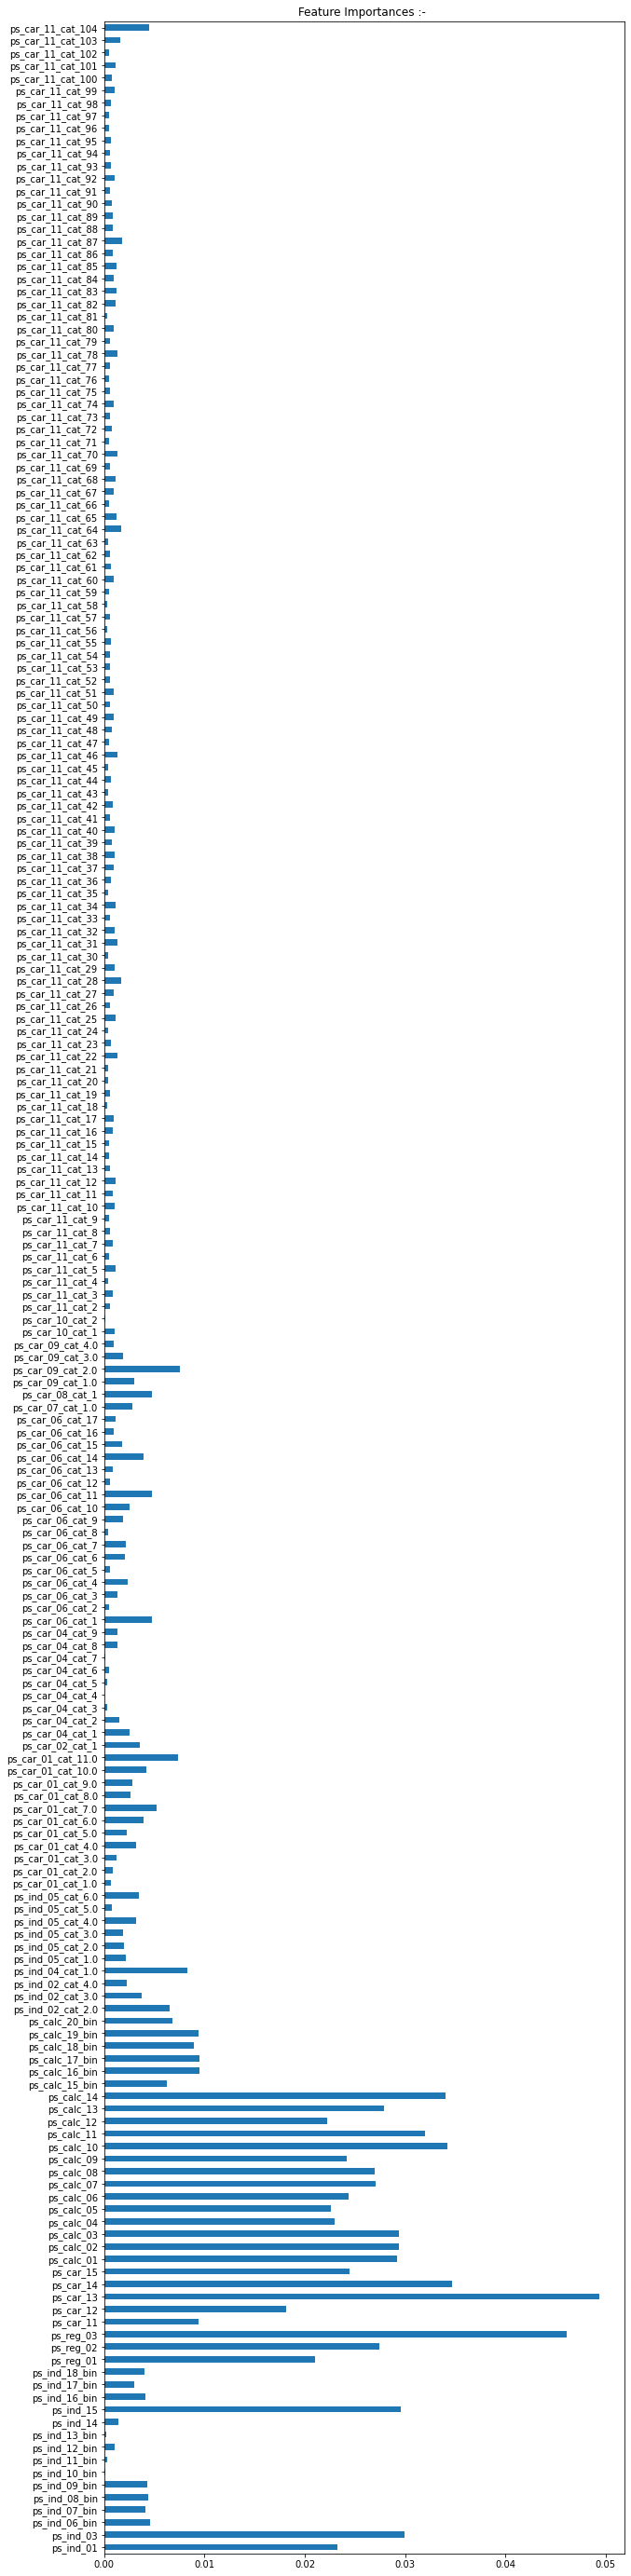

In [ ]:
model = RandomForestClassifier()
model.fit(x,y)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(10,50))
feat_importances.plot(kind='barh')
plt.title('Feature Importances :- ')
plt.show()

In [ ]:
sfm = SelectFromModel(model, threshold='median', prefit=True)
print('Number of features before selection: {}'.format(x.shape[1]))
n_features = sfm.transform(x).shape[1]
print('Number of features after selection: {}'.format(n_features))
feat_labels = x.columns
selected_vars = list(feat_labels[sfm.get_support()])

Number of features before selection: 202
Number of features after selection: 101


Train Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.33, random_state = 20)

In [ ]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(398792, 202) (398792,) (196420, 202) (196420,)


9. What should be the preferred way in this case to balance the data?

  - I would prefer to try Over sampling of data first.
Because, we can loose information in under sampling. If our model overfits, then we can try different ratios and undersampling techniques or combination of both.

- Tried different ratios, Under and over sampling to look which one gives better results

- References:- 

- https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8

- https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-ii-over-sampling-d61b43bc4879

- https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

- https://towardsdatascience.com/sampling-techniques-for-extremely-imbalanced-data-part-i-under-sampling-a8dbc3d8d6d8

- https://machinelearningmastery.com/undersampling-algorithms-for-imbalanced-classification/



In [ ]:
print(X_train.shape,Y_train.shape)

(398792, 202) (398792,)


In [ ]:
#undersample = under_sampling.NearMiss(version=3, n_neighbors=3)
# transform the dataset
#X_train_resampled, Y_train_resampled = undersample.fit_resample(X_train, Y_train)

In [ ]:
#from imblearn import under_sampling, over_sampling, pipeline

# Combination of Up and Down Sampling
#over = over_sampling.SMOTE(sampling_strategy=0.1)
#under = under_sampling.RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#pipeline = pipeline.Pipeline(steps=steps)
# transform the dataset
#X_train_resampled, Y_train_resampled = pipeline.fit_resample(X_train, Y_train)

In [ ]:
smote = over_sampling.SMOTE(sampling_strategy='minority')
X_train_resampled, Y_train_resampled = smote.fit_sample(X_train, Y_train)

In [ ]:
print(X_train_resampled.shape,Y_train_resampled.shape)

(768710, 202) (768710,)


In [ ]:
print('Original Dataset counts : {}'.format(Counter(Y_train)))
print('Resampled Dataset counts : {}'.format(Counter(Y_train_resampled)))

Original Dataset counts : Counter({0: 384355, 1: 14437})
Resampled Dataset counts : Counter({0: 384355, 1: 384355})


10. How many training records are there after achieving a balance of 12%?

> > > 430477 Records, with 0: 384355, 1: 46122

17. In nominal and interval features, which features are suitable for StandardScaler?

- Scaling should be applied to all the independent variables or features
 irrespective of whether they are nominal or interval. 
- Scaling actually makes the data "unitless".
- If there is more significant numbers in a column, then that column starts playing a more decisive role while training the model. Thus feature scaling is needed to bring every feature in the same footing without any upfront importance.
- The most common techniques of feature scaling are Normalization and Standardization.
  - Normalization is used when we want to bound our values between two numbers, typically, between [0,1] or [-1,1]. 
  - Standardization transforms the data to have zero mean and a variance of 1
- In many algorithms, when we desire faster convergence, scaling is a MUST like in Neural Network.


  - References

      -https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
      
      -https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e


In [ ]:
type(X_train_resampled)

numpy.ndarray

In [ ]:
X_train_resampled=pd.DataFrame(X_train_resampled,columns=x.columns)

In [ ]:
#X_train_resampled.head()

In [ ]:
#Standardizing training data
X_train_resampled = X_train_resampled[selected_vars]

scaler = StandardScaler()
X_train_resampled=scaler.fit_transform(X_train_resampled)

In [ ]:
#Normalizing training data
#X_train_resampled = X_train_resampled[selected_vars]

#X_train_resampled = normalize(X_train_resampled)

In [ ]:
X_train_resampled

array([[-1.00430091, -0.54414436,  1.41769424, ..., -0.12767882,
        -0.20776496, -0.45992881],
       [ 2.56291568,  1.31706921, -0.79069799, ..., -0.12767882,
        -0.20776496, -0.45992881],
       [-0.49469854,  2.43379735, -0.79069799, ..., -0.12767882,
        -0.20776496,  2.53912352],
       ...,
       [-1.00430091, -1.28348836,  1.38719184, ..., -0.12767882,
        -0.20776496, -0.45992881],
       [ 1.54371094,  1.62633915, -0.79069799, ..., -0.12767882,
        -0.20776496, -0.45992881],
       [-1.00430091,  1.2594891 , -0.79069799, ..., -0.12767882,
        -0.20776496,  0.00397753]])

In [ ]:
X_train_resampled.shape

(768710, 101)

In [ ]:
#Standardizing testing data
X_test_resampled = X_test[selected_vars]

X_test_resampled=scaler.transform(X_test_resampled)

In [ ]:
#Normalizing training data
#X_test_resampled = X_test[selected_vars]

#X_test_resampled = normalize(X_test_resampled)

In [ ]:
X_test_resampled

array([[-1.00430091, -0.54414436,  1.41769424, ..., -0.12767882,
        -0.20776496,  2.53912352],
       [-0.49469854,  1.31706921,  1.41769424, ..., -0.12767882,
        -0.20776496, -0.45992881],
       [ 1.54371094, -0.91638708, -0.79069799, ..., -0.12767882,
        -0.20776496,  2.53912352],
       ...,
       [-0.49469854,  2.43379735, -0.79069799, ..., -0.12767882,
        -0.20776496, -0.45992881],
       [-0.49469854,  0.57258378, -0.79069799, ..., -0.12767882,
        -0.20776496,  2.53912352],
       [-1.00430091,  1.68931192,  1.41769424, ..., -0.12767882,
        -0.20776496, -0.45992881]])

In [ ]:
X_test_resampled.shape

(196420, 101)

18. Summarize the learnings of ED

  - For most of the Exploratory analysis, Learning are mentioned at their respective sections. Important ones are:-
    - Missing Values are replaced with Mean or Most frequently occured value according to their datatype
    - Imbalance in the dataset is fixed Downsampling the majority class using NearMiss Version-3 algorithm



#Modeling

  - Common custom functions for metrics

In [ ]:
#Declaring these for comparision between models
predictions=pd.DataFrame()
AccuracyScore_dict={}
PrecisionScore_dict={}
RecallScore_dict={}
R2Score_dict={}
F1Score_dict={}
ROCAUCscore_dict={}

In [ ]:
def Model_Evaluator(modelInstance,ModelName,X_train,Y_train,X_test,Y_test,Y_Pred):
  predictions[ModelName] = Y_Pred

  print(ModelName,'Model:-')

  AccuracyScore = accuracy_score(Y_test,Y_Pred)
  PrecisionScore = precision_score(Y_test,Y_Pred)
  RecallScore = recall_score(Y_test,Y_Pred)
  F1Score = f1_score(Y_test,Y_Pred)  
  ROCAUCscore = roc_auc_score(Y_test,Y_Pred)

  print('Confusion Matrix : \n' + str(confusion_matrix(Y_test,Y_Pred)))
  print('Classification Report : \n' + classification_report(Y_test,Y_Pred)) 
  print("Accuracy Score: ", AccuracyScore)
  print("Precision Score: ", PrecisionScore)
  print('Recall Score :', RecallScore)  
  print('F1 Score :', F1Score)
  print('ROC AUC score :', ROCAUCscore)

  AccuracyScore_dict[ModelName] = AccuracyScore
  PrecisionScore_dict[ModelName] = PrecisionScore
  RecallScore_dict[ModelName] =  RecallScore
  F1Score_dict[ModelName] = F1Score
  ROCAUCscore_dict[ModelName] = ROCAUCscore

 - Logistic Regression

> > a) On Original Data

In [ ]:
Orig_LR = LogisticRegression(random_state=0).fit(X_train,Y_train)
Y_pred = Orig_LR.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
Model_Evaluator(Orig_LR,'Original_Data_LogisticRegression',X_train,Y_train,X_test,Y_test,Y_pred)

Original_Data_LogisticRegression Model:-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix : 
[[189163      0]
 [  7257      0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189163
           1       0.00      0.00      0.00      7257

    accuracy                           0.96    196420
   macro avg       0.48      0.50      0.49    196420
weighted avg       0.93      0.96      0.94    196420

Accuracy Score:  0.9630536605233683
Precision Score:  0.0
Recall Score : 0.0
F1 Score : 0.0
ROC AUC score : 0.5


      

> > b) On Resampled Data





In [ ]:
Resampled_LR = LogisticRegression(random_state=0).fit(X_train_resampled,Y_train_resampled)
Y_pred = Resampled_LR.predict(X_test_resampled)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
Model_Evaluator(Resampled_LR,'Resampled_Data_LogisticRegression',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

Resampled_Data_LogisticRegression Model:-
Confusion Matrix : 
[[113228  75935]
 [  3186   4071]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.60      0.74    189163
           1       0.05      0.56      0.09      7257

    accuracy                           0.60    196420
   macro avg       0.51      0.58      0.42    196420
weighted avg       0.94      0.60      0.72    196420

Accuracy Score:  0.5971846044191019
Precision Score:  0.05088368372372072
Recall Score : 0.5609756097560976
F1 Score : 0.09330414952499913
ROC AUC score : 0.5797746633017363


  - Logistic Regression with GridSearch Cross Validation

In [ ]:
LogisticRegression=LogisticRegression()
param_grid_LR = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,2,5],'solver':['liblinear']}

In [ ]:
grid_search = GridSearchCV(estimator = LogisticRegression, param_grid=param_grid_LR, cv=3, verbose=2)   
LR_GS = grid_search.fit(X_train_resampled, Y_train_resampled)
Y_pred = LR_GS.predict(X_test_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=0.001, penalty=l1, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ C=0.001, penalty=l1, solver=liblinear, total=  58.4s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.4s remaining:    0.0s


[CV] ............ C=0.001, penalty=l1, solver=liblinear, total=  36.8s
[CV] C=0.001, penalty=l1, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l1, solver=liblinear, total=  13.5s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l2, solver=liblinear, total=  18.5s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l2, solver=liblinear, total=  15.4s
[CV] C=0.001, penalty=l2, solver=liblinear ...........................
[CV] ............ C=0.001, penalty=l2, solver=liblinear, total=  18.0s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV] ............. C=0.01, penalty=l1, solver=liblinear, total=  22.4s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV] ............. C=0.01, penalty=l1, solver=liblinear, total=  22.9s
[CV] C=0.01, penalty=l1, solver=liblinear ............................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 13.4min finished


In [ ]:
LR_GS.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Model_Evaluator(LR_GS,'LogisticRegression_CV',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

LogisticRegression_CV Model:-
Confusion Matrix : 
[[113228  75935]
 [  3186   4071]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.60      0.74    189163
           1       0.05      0.56      0.09      7257

    accuracy                           0.60    196420
   macro avg       0.51      0.58      0.42    196420
weighted avg       0.94      0.60      0.72    196420

Accuracy Score:  0.5971846044191019
Precision Score:  0.05088368372372072
Recall Score : 0.5609756097560976
F1 Score : 0.09330414952499913
ROC AUC score : 0.5797746633017363


  - XGBoost Classifier

In [ ]:
xgb_model = xgb.XGBClassifier()
param_grid_xgb = {"objective":["binary:logistic"],
                  'colsample_bytree': [0.7],
                  'learning_rate': [0.1],
                  'max_depth': [10], 
                  'alpha': [5], 
                  'n_estimators':[1000,2000]}

In [ ]:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=3,verbose=2)
xgb_GS=grid_search.fit(X_train_resampled, Y_train_resampled)
print('Best Estimator for XGBoostClassifier is',xgb_GS.best_estimator_)
Y_pred = xgb_GS.predict(X_test_resampled)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=1000, objective=binary:logistic 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=1000, objective=binary:logistic, total=34.3min
[CV] alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=1000, objective=binary:logistic 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 34.3min remaining:    0.0s


[CV]  alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=1000, objective=binary:logistic, total=68.7min
[CV] alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=1000, objective=binary:logistic 
[CV]  alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=1000, objective=binary:logistic, total=70.1min
[CV] alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=2000, objective=binary:logistic 
[CV]  alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=2000, objective=binary:logistic, total=48.5min
[CV] alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=2000, objective=binary:logistic 
[CV]  alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=2000, objective=binary:logistic, total=134.6min
[CV] alpha=5, colsample_bytree=0.7, learning_rate=0.1, max_depth=10, n_estimators=2000, objective=binary:logistic 
[CV]  alpha=5, cols

[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 492.2min finished


Best Estimator for XGBoostClassifier is XGBClassifier(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [ ]:
xgb_GS.best_estimator_

XGBClassifier(alpha=5, base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
Model_Evaluator(xgb_GS,'XGBClassifier',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

XGBClassifier Model:-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix : 
[[189163      0]
 [  7257      0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189163
           1       0.00      0.00      0.00      7257

    accuracy                           0.96    196420
   macro avg       0.48      0.50      0.49    196420
weighted avg       0.93      0.96      0.94    196420

Accuracy Score:  0.9630536605233683
Precision Score:  0.0
Recall Score : 0.0
F1 Score : 0.0
ROC AUC score : 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


  - AdaBoost Classifier

In [ ]:
AdaBoostClassifier=AdaBoostClassifier()
param_grid_abc = {'n_estimators': [1000],
             'learning_rate': [0.01,0.1]}

In [ ]:
grid_search = GridSearchCV(estimator = AdaBoostClassifier,param_grid=param_grid_abc,cv=3,verbose=2)   
ABC_GS = grid_search.fit(X_train_resampled, Y_train_resampled)
print('Best Estimator for AdaBoostClassifier is',grid_search.best_estimator_)
Y_pred = ABC_GS.predict(X_test_resampled)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] learning_rate=0.01, n_estimators=1000 ...........................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............ learning_rate=0.01, n_estimators=1000, total=54.3min
[CV] learning_rate=0.01, n_estimators=1000 ...........................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 54.3min remaining:    0.0s


[CV] ............ learning_rate=0.01, n_estimators=1000, total=51.0min
[CV] learning_rate=0.01, n_estimators=1000 ...........................
[CV] ............ learning_rate=0.01, n_estimators=1000, total=51.3min
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=51.4min
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=50.7min
[CV] learning_rate=0.1, n_estimators=1000 ............................
[CV] ............. learning_rate=0.1, n_estimators=1000, total=50.4min


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 309.1min finished


Best Estimator for AdaBoostClassifier is AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=1000, random_state=None)


In [ ]:
ABC_GS.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=1000, random_state=None)

In [ ]:
Model_Evaluator(ABC_GS,'AdaBoostClassifier',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

AdaBoostClassifier Model:-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix : 
[[189163      0]
 [  7257      0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189163
           1       0.00      0.00      0.00      7257

    accuracy                           0.96    196420
   macro avg       0.48      0.50      0.49    196420
weighted avg       0.93      0.96      0.94    196420

Accuracy Score:  0.9630536605233683
Precision Score:  0.0
Recall Score : 0.0
F1 Score : 0.0
ROC AUC score : 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Linear SVC

In [ ]:
Linear_SVC = LinearSVC()
param_grid_Linear_SVC = {'dual':[True,False],
                         'max_iter':[1000,3000,5000]}

In [ ]:
grid_search = GridSearchCV(estimator=Linear_SVC, param_grid=param_grid_Linear_SVC, cv=3,verbose=2)
LinearSVC_GS=grid_search.fit(X_train_resampled, Y_train_resampled)
print('Best Estimator for LinearSVC is',LinearSVC_GS.best_estimator_)
Y_pred = LinearSVC_GS.predict(X_test_resampled)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] dual=True, max_iter=1000 ........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  7.9min remaining:    0.0s


[CV] ......................... dual=True, max_iter=1000, total= 7.9min
[CV] dual=True, max_iter=1000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=1000, total= 8.4min
[CV] dual=True, max_iter=1000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=1000, total= 8.6min
[CV] dual=True, max_iter=3000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=3000, total=25.4min
[CV] dual=True, max_iter=3000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=3000, total=23.8min
[CV] dual=True, max_iter=3000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=3000, total=25.4min
[CV] dual=True, max_iter=5000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=5000, total=39.4min
[CV] dual=True, max_iter=5000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=5000, total=38.4min
[CV] dual=True, max_iter=5000 ........................................


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ......................... dual=True, max_iter=5000, total=39.2min
[CV] dual=False, max_iter=1000 .......................................
[CV] ........................ dual=False, max_iter=1000, total=  20.0s
[CV] dual=False, max_iter=1000 .......................................
[CV] ........................ dual=False, max_iter=1000, total=  15.3s
[CV] dual=False, max_iter=1000 .......................................
[CV] ........................ dual=False, max_iter=1000, total=  14.8s
[CV] dual=False, max_iter=3000 .......................................
[CV] ........................ dual=False, max_iter=3000, total=  20.6s
[CV] dual=False, max_iter=3000 .......................................
[CV] ........................ dual=False, max_iter=3000, total=  14.7s
[CV] dual=False, max_iter=3000 .......................................
[CV] ........................ dual=False, max_iter=3000, total=  14.2s
[CV] dual=False, max_iter=5000 .......................................
[CV] .

[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed: 218.9min finished


Best Estimator for XGBoostClassifier is LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=3000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
LinearSVC_GS.best_estimator_

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=3000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
Model_Evaluator(LinearSVC_GS,'Linear_SVC',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

Linear_SVC Model:-
Confusion Matrix : 
[[113047  76116]
 [  3180   4077]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.60      0.74    189163
           1       0.05      0.56      0.09      7257

    accuracy                           0.60    196420
   macro avg       0.51      0.58      0.42    196420
weighted avg       0.94      0.60      0.72    196420

Accuracy Score:  0.5962936564504633
Precision Score:  0.050839848864614116
Recall Score : 0.5618023976849938
F1 Score : 0.0932418524871355
ROC AUC score : 0.5797096338958636


- SVC with Imbalance check, Feature importance and 100k Records

In [ ]:
n =  100000
index = np.random.choice(X_train_resampled.shape[0], n, replace=False)  

X_train_resampled_1 = X_train_resampled[index]
Y_train_resampled_1 = Y_train_resampled[index]

In [ ]:
X_train_resampled_1.shape

(100000, 101)

In [ ]:
Y_train_resampled_1.shape

(100000,)

In [ ]:
SVM_SVC = SVC()
SVM_SVC = SVM_SVC.fit(X_train_resampled_1, Y_train_resampled_1)
Y_pred = SVM_SVC.predict(X_test_resampled)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
Model_Evaluator(SVM_SVC,'SVC',X_train_resampled_1,Y_train_resampled_1,X_test_resampled,Y_test,Y_pred)

SVC Model:-
Confusion Matrix : 
[[188909    254]
 [  7226     31]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189163
           1       0.11      0.00      0.01      7257

    accuracy                           0.96    196420
   macro avg       0.54      0.50      0.49    196420
weighted avg       0.93      0.96      0.94    196420

Accuracy Score:  0.9619183382547603
Precision Score:  0.10877192982456141
Recall Score : 0.004271737632630564
F1 Score : 0.008220631132325644
ROC AUC score : 0.5014644901640418


- MLP Classifier

In [ ]:
MLP_Classifier = MLPClassifier(hidden_layer_sizes=(102,500,2), max_iter=500,activation = 'relu',solver='adam',random_state=1)
MLP_Classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred = MLP_Classifier.predict(X_test_resampled)

In [ ]:
Model_Evaluator(MLP_Classifier,'MLPClassifier',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

MLPClassifier Model:-
Confusion Matrix : 
[[181230   7933]
 [  6870    387]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96    189163
           1       0.05      0.05      0.05      7257

    accuracy                           0.92    196420
   macro avg       0.50      0.51      0.51    196420
weighted avg       0.93      0.92      0.93    196420

Accuracy Score:  0.9246359841156705
Precision Score:  0.04651442307692308
Recall Score : 0.05332782141380736
F1 Score : 0.04968864351287155
ROC AUC score : 0.5056952223270408


- Random Forest Classifier

In [ ]:
#Implementing RandomForestClassifier
RandomForestClassifier=RandomForestClassifier()
RFC_param_grid = {'n_estimators': [1200],
                  'max_features': [30],
                  'min_samples_leaf': [1]}

In [ ]:
grid_search = GridSearchCV(estimator = RandomForestClassifier,param_grid=RFC_param_grid,cv=3,verbose=2)
RFC_GS = grid_search.fit(X_train_resampled, Y_train_resampled)
print('Best Estimator for RandomForestClassifier is',grid_search.best_estimator_)
Y_pred = RFC_GS.predict(X_test_resampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] max_features=30, min_samples_leaf=1, n_estimators=1200 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_features=30, min_samples_leaf=1, n_estimators=1200, total=77.4min
[CV] max_features=30, min_samples_leaf=1, n_estimators=1200 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 77.4min remaining:    0.0s


[CV]  max_features=30, min_samples_leaf=1, n_estimators=1200, total=83.2min
[CV] max_features=30, min_samples_leaf=1, n_estimators=1200 ..........
[CV]  max_features=30, min_samples_leaf=1, n_estimators=1200, total=82.9min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 243.6min finished


Best Estimator for RandomForestClassifier is RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
RFC_GS.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
Model_Evaluator(RFC_GS,'RandomForestClassifier',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

RandomForestClassifier Model:-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix : 
[[189163      0]
 [  7257      0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189163
           1       0.00      0.00      0.00      7257

    accuracy                           0.96    196420
   macro avg       0.48      0.50      0.49    196420
weighted avg       0.93      0.96      0.94    196420

Accuracy Score:  0.9630536605233683
Precision Score:  0.0
Recall Score : 0.0
F1 Score : 0.0
ROC AUC score : 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- Gradient Boost Classifier

In [ ]:
GBClassifier=GradientBoostingClassifier()
param_grid_gbc = {'n_estimators': [1500],
                  'learning_rate': [0.01,0.1],
                  'max_features':[10,30]
                 }

In [ ]:
grid_search = GridSearchCV(estimator = GBClassifier,param_grid=param_grid_gbc,cv=3,verbose=2)   
GBC_GS = grid_search.fit(X_train_resampled, Y_train_resampled)
print('Best Estimator for GradientBoostingClassifier is',grid_search.best_estimator_)
Y_pred = GBC_GS.predict(X_test_resampled)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] learning_rate=0.01, max_features=10, n_estimators=1500 ..........


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, max_features=10, n_estimators=1500, total=16.7min
[CV] learning_rate=0.01, max_features=10, n_estimators=1500 ..........


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 16.7min remaining:    0.0s


[CV]  learning_rate=0.01, max_features=10, n_estimators=1500, total=16.6min
[CV] learning_rate=0.01, max_features=10, n_estimators=1500 ..........
[CV]  learning_rate=0.01, max_features=10, n_estimators=1500, total=16.0min
[CV] learning_rate=0.01, max_features=30, n_estimators=1500 ..........
[CV]  learning_rate=0.01, max_features=30, n_estimators=1500, total=40.4min
[CV] learning_rate=0.01, max_features=30, n_estimators=1500 ..........
[CV]  learning_rate=0.01, max_features=30, n_estimators=1500, total=40.8min
[CV] learning_rate=0.01, max_features=30, n_estimators=1500 ..........
[CV]  learning_rate=0.01, max_features=30, n_estimators=1500, total=40.0min
[CV] learning_rate=0.1, max_features=10, n_estimators=1500 ...........
[CV]  learning_rate=0.1, max_features=10, n_estimators=1500, total=15.9min
[CV] learning_rate=0.1, max_features=10, n_estimators=1500 ...........
[CV]  learning_rate=0.1, max_features=10, n_estimators=1500, total=15.4min
[CV] learning_rate=0.1, max_features=10, n_e

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 323.6min finished


Best Estimator for GradientBoostingClassifier is GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
GBC_GS.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=10, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=1500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Model_Evaluator(GBC_GS,'GradientBoostClassifier',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

GradientBoostClassifier Model:-
Confusion Matrix : 
[[189156      7]
 [  7257      0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189163
           1       0.00      0.00      0.00      7257

    accuracy                           0.96    196420
   macro avg       0.48      0.50      0.49    196420
weighted avg       0.93      0.96      0.94    196420

Accuracy Score:  0.9630180226046228
Precision Score:  0.0
Recall Score : 0.0
F1 Score : 0.0
ROC AUC score : 0.4999814974387169


- Extra Trees Classifier

In [ ]:
ETC=ExtraTreesClassifier()
param_grid_ETC={'n_estimators': [500],
                'max_features':[30]
               }

In [ ]:
grid_search = GridSearchCV(estimator=ETC, param_grid = param_grid_ETC,cv=3,verbose=2)
ETC_GS = grid_search.fit(X_train_resampled, Y_train_resampled)
print('Best Estimator for ExtraTreesClassifier is',grid_search.best_estimator_)
Y_pred = ETC_GS.predict(X_test_resampled)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] max_features=30, n_estimators=500 ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ max_features=30, n_estimators=500, total=37.9min
[CV] max_features=30, n_estimators=500 ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 37.9min remaining:    0.0s


[CV] ................ max_features=30, n_estimators=500, total=40.0min
[CV] max_features=30, n_estimators=500 ...............................
[CV] ................ max_features=30, n_estimators=500, total=44.7min


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 122.7min finished


Best Estimator for ExtraTreesClassifier is ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=30, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)


In [ ]:
ETC_GS.best_estimator_

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features=30, max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=500,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
Model_Evaluator(ETC_GS,'ExtraTreesClassifier',X_train_resampled,Y_train_resampled,X_test_resampled,Y_test,Y_pred)

ExtraTreesClassifier Model:-


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion Matrix : 
[[189163      0]
 [  7257      0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    189163
           1       0.00      0.00      0.00      7257

    accuracy                           0.96    196420
   macro avg       0.48      0.50      0.49    196420
weighted avg       0.93      0.96      0.94    196420

Accuracy Score:  0.9630536605233683
Precision Score:  0.0
Recall Score : 0.0
F1 Score : 0.0
ROC AUC score : 0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


1. The Simple Logistic Regression Model seems to have high accuracy. Is that what we need at all? What is the problem with this model?

> > Ans:- 

> > Simple Logistic Regression Model gives high accuracy (96.3%). But if we look at the Confusion Matrix, we can see that it has failed to classify class-1 completely.

> > The problem with this model is that, the model is unable to predict the minority class. 

> > Accuracy is not a good metric to evaluate a model in this kind of imbalanced datasets. We have to look at metrics like Precision, Recall and f1-score to evaluate a model in this case.

2. Why do you think f1-score is 0.0?

> > Ans:-

> > f1-score is 0.0 for a class means that the model has miserably failed in classifying that class. This means the model is biased towards the majority class.

> > In our case, we are not not at all predicting a person who is likely to be claiming insurance.

> > Because of this, our Precision and Recall are also 0.0. This leading to F1 Score 0.0

3. What is the precision and recall score for the model?



> > Ans:- 

> > Simple Logistic Regression Model gives high accuracy (96.3%). But if we look at the Confusion Matrix, we can see that it has failed to classify class-1 completely.

> > That is the reason. Accuracy is not the metric for evaluating imbalanced datasets.

> > SO, we have to look at Precision, Recall and F1 Score

> > **Precision** is a good measure to determine, when the costs of False Positive is high. 

> > > Precision = True Positive/(True Positive + False Positive)

> > > In our case, a false positive means that a non-claimer of insurance has been identified as a claimer. Then company might quote a high insurance amount for a non-claimer if the precision is not high for the classifier.

> > **Recall** actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

> > > Recall = True Positive/(True Positive + False Negative)

> > > In our case, If a Claimer is predicted a non-claimer, then the company will lead to losses.

> > **F1 Score** is needed when you want to seek a balance between Precision and Recall. Right…so what is the difference between F1 Score and Accuracy then? We have previously seen that accuracy can be largely contributed by a large number of True Negatives which in most business circumstances, we do not focus on much whereas False Negative and False Positive usually has business costs (tangible & intangible) thus F1 Score might be a better measure to use if we need to seek a balance between Precision and Recall AND there is an uneven class distribution (large number of Actual Negatives).

> > > F1 = 2((Precision * Recall) / (Precision + Recall))

> > Generally, this problem deals with the trade-off between recall (percent of truly positive instances that were classified as such) and precision (percent of positive classifications that are truly positive). 

> > In situations where we want to detect instances of a minority class, we are usually concerned more so with recall than precision, as in the context of detection, it is usually more costly to miss a positive instance than to falsely label a negative instance. 

> > While recall expresses the ability to find all relevant instances in a dataset, precision expresses the proportion of the data points our model says was relevant actually were relevant.


> > References:-

> > > https://medium.com/analytics-vidhya/notes-on-sensitivity-specificity-precision-recall-and-f1-score-e34204d0bb9b

4. What is the most important inference you can draw from the result?

> > Ans -

> > - Do not go with the Accuracy as a metric for imbalanced datasets

> > - Because of oversampling of minority class, the majority class can take a hit on its accuracy.

> > - Some times what we call as best models doesn't perform well. This might because of the huge dataset that we are unable to give enough 'n_estimators' for these models to build.



5. What is the accuracy score and f1-score for the improved Logistic Regression model?

> > Ans - 

> > Accuracy score - 59.71%

> > f1-score - 0.09

6. Why do you think f1-score has improved?

> > Ans -

> > f-1 score has improved because the model has predicted both the classes to an extent, without biasing towards the majority class. 

> > If we look at the Recall, we can see that the class0 has 60% and class1 has 56%. This the main reason behind improvement of f1-score.

7. For model LinearSVC play with parameters – dual, max_iter and see if there is any improvement

> > Ans -

> > LinearSVC is the 2nd best model in our current problem. Compared to most of the models, it has performed well for a imbalanced dataset.

8. SVC with Imbalance Check & Feature Optimization & only 100K Records → is there improvement in scores?

> > Ans - 

> > No improvement because while picking only 100k records, we are loosing information here.


9. XGBoost is one the better classifiers -- but still f1-score is very low. What could be the reason?

> > Ans - 

> > XGBoost is not the best model in our case here. It is failing miserably in identifying minority class.

> > The reason could be the memory constraint. I am unable to use high number for n_estimators.

10. What is the increase in number of features after one-hot encoding of the data?

> >Ans -

> > > Before One Hot Encoding, we have 56 Features.

> > > After One Hot Encoding, we have 203 Features

11. Is there any improvement in scores after encoding?

> > Ans - 

> > Yes there is improvement in scores

12. If not missing a positive sample is the priority which model is best so far?

> > Ans -

> > If not missing a Positive sample (class0/Majority class) is the priority, then models like - Logistic Regression on original data, RandomForest, XGBoost are the best models so far.

13. If not marking negative sample as positive is top priority, which model is best so far?

> > Ans-

> > If not missing a Negative sample (class1/Minority class) is the priority, then models use models like Logistic Regression, SVM

14. Do you think using AdaBoost can give any significant improvement over XGBoost?

> > Ans-

> > Adaboost also failed in classifying the minority class

15. MLPClassifier is the neural network we are trying. But how to choose the right no. of layers and size?

> > Ans - 

> > There is no final, definite, rule of thumb on how many nodes (or hidden neurons) or how many layers one should choose. a trial and error approach will give you the best results for your individual problem. 

> > The following formula may give you a starting point:

> > > > > > > <img src="https://miro.medium.com/max/152/1*9jY98E1ndGBcob6GypYM1Q.png">

> > > Where,

> > > > Nᵢ is the number of input neurons

> > > > Nₒ the number of output neurons

> > > > Nₛ the number of samples in the training data

> > > > α represents a scaling factor that is usually between 2 and 10. We can calculate 8 different numbers to feed into our validation procedure and find the optimal model, based on the resulting validation loss.




16. At what layer size we get the best f1-score?

> > Ans -

> > 500